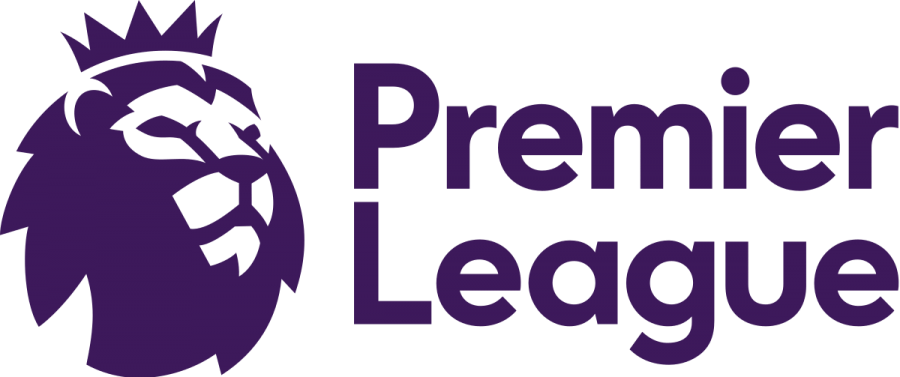 

 # Overview

The data for this project is sourced manually from https://www.fotmob.com. It consists of match results from each round of the 2023/2024 season.

The objective is to develop a Machine Learning system that predicts the probabilities of Win, Loss, and Draw based on the input data.

# Input data

The input data includes the following features:

 #### * Opponent Team's Name 

#### * Opponent Team's Rating

#### * Opponent Status (Host or Guest)


#### * Opponent Team's Lineup: The number of players in each position.


#### * User Team's Rating

#### * User Team's Lineup: The number of players in each position, indicated by positions ending with 'r'.


# Phase 1 : Data Loading and Data Analysis

In [33]:
# Import necessaries
from pandas import get_dummies , read_excel , DataFrame , concat
from matplotlib.pyplot import pie , bar , show , title , ylabel , savefig

In [34]:
# Data loading
def Read_data(path)->'pd.DataFrame':
    '''Reads an Excel file and returns it as a pandas DataFrame.
    
    Args:
        path (str): The path to the Excel file.
        
    Returns:
        pd.DataFrame: The data read from the Excel file.
    '''
    file = read_excel(path)
    dataframe = file.copy()
    return dataframe

try:
    df = Read_data('Dataset_2023.2024.xlsx')
except:
    print('An error occured when reading the file!')

In [35]:
df.sample(10)

,Team,Status,Team rating,CB,LB,RB,ST,CM,AM,LM,...,STr,CMr,AMr,LMr,DMr,LWr,RWr,RMr,Result,Round
566,West ham,Home,7.0,2,1,1,1,0,1,0,...,2,2,0,1,0,0,0,1,Draw,29
480,Brentford,Home,6.3,3,0,0,2,3,0,1,...,1,3,0,0,0,1,1,0,Lost,25
163,Wolves,Guest,7.6,3,0,0,1,2,0,1,...,1,0,1,0,2,1,1,0,Win,9
590,Tottenham,Home,7.3,2,1,1,1,0,1,0,...,1,3,0,0,0,1,1,0,Win,30
513,Newcatle,Guest,6.1,2,1,1,1,3,0,0,...,1,3,0,0,0,1,1,0,Lost,26
175,Man utd,Guest,7.4,2,1,1,1,0,1,0,...,2,2,0,1,0,0,0,1,Win,9
714,Chelsea,Home,7.9,2,1,1,1,0,1,0,...,1,0,1,0,2,1,1,0,Win,36
682,Fulham,Home,6.9,2,1,1,1,0,1,0,...,1,2,2,1,0,0,0,1,Draw,35
176,Aston Villa,Home,7.7,2,1,1,2,2,0,1,...,1,0,1,0,2,1,1,0,Win,9
113,Bournemouth,Guest,6.2,2,1,1,1,0,1,0,...,1,0,1,0,2,1,1,0,Lost,6


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Team               760 non-null    object 
 1   Status             760 non-null    object 
 2   Team rating        760 non-null    float64
 3   CB                 760 non-null    int64  
 4   LB                 760 non-null    int64  
 5   RB                 760 non-null    int64  
 6   ST                 760 non-null    int64  
 7   CM                 760 non-null    int64  
 8   AM                 760 non-null    int64  
 9   LM                 760 non-null    int64  
 10  DM                 760 non-null    int64  
 11  LW                 760 non-null    int64  
 12  RW                 760 non-null    int64  
 13  RM                 760 non-null    int64  
 14  Rival team rating  760 non-null    float64
 15  CBr                760 non-null    int64  
 16  LBr                760 non

In [37]:
# Find number of null values
df.isnull().sum()

Team                 0
Status               0
Team rating          0
CB                   0
LB                   0
RB                   0
ST                   0
CM                   0
AM                   0
LM                   0
DM                   0
LW                   0
RW                   0
RM                   0
Rival team rating    0
CBr                  0
LBr                  0
RBr                  0
STr                  0
CMr                  0
AMr                  0
LMr                  0
DMr                  0
LWr                  0
RWr                  0
RMr                  0
Result               0
Round                0
dtype: int64

In [38]:
# Find number of duplicated values
df.duplicated().sum()

0

In [39]:
df.describe()

,Team rating,CB,LB,RB,ST,CM,AM,LM,DM,LW,...,RBr,STr,CMr,AMr,LMr,DMr,LWr,RWr,RMr,Round
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,...,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,6.911184,2.226316,0.803947,0.803947,1.164474,1.414474,0.713158,0.325000,0.875000,0.673684,...,0.803947,1.164474,1.414474,0.713158,0.325000,0.875000,0.673684,0.673684,0.326316,19.500000
std,0.483911,0.418721,0.397270,0.397270,0.374484,1.311970,0.682424,0.468683,0.993473,0.469173,...,0.397270,0.374484,1.311970,0.682424,0.468683,0.993473,0.469173,0.469173,0.469173,10.973078
min,5.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.500000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,6.900000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,19.500000
75%,7.300000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,29.000000
max,8.000000,3.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,38.000000


In [40]:
print(f'There are {len(df)} records from {len(df.Team.unique())} unique teams.\nAverage rating for entire season is {df["Team rating"].mean():0.1f}.')

There are 760 records from 20 unique teams.
Average rating for entire season is 6.9.


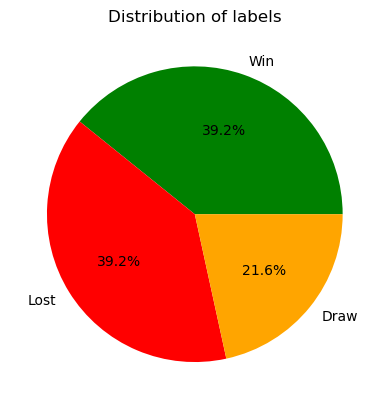

In [41]:
# Create a pie chart for the overall distribution of results
pie(df.Result.value_counts().values,labels=['Win','Lost','Draw'],autopct='%1.1f%%',colors=['green','red','orange'])
title(f'Distribution of labels')
show()

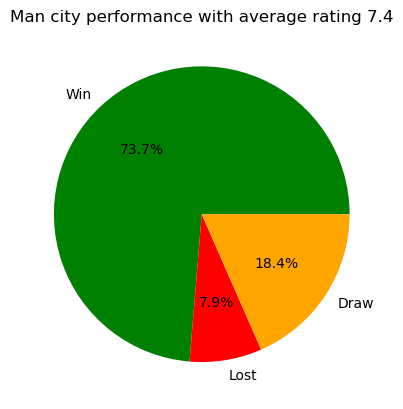

****************************************************************************************************


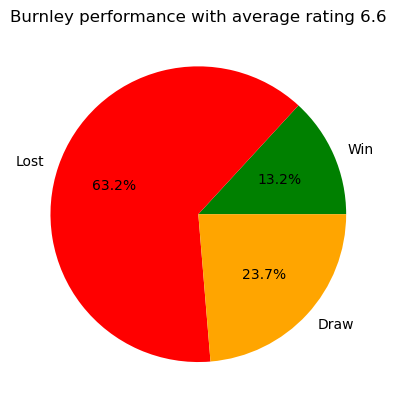

****************************************************************************************************


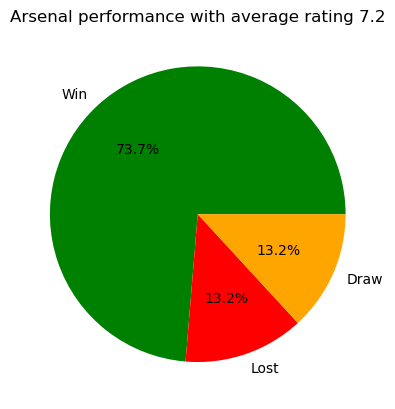

****************************************************************************************************


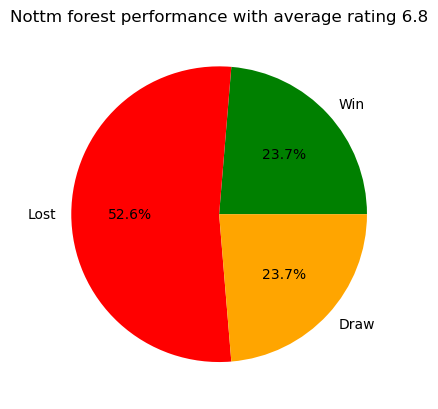

****************************************************************************************************


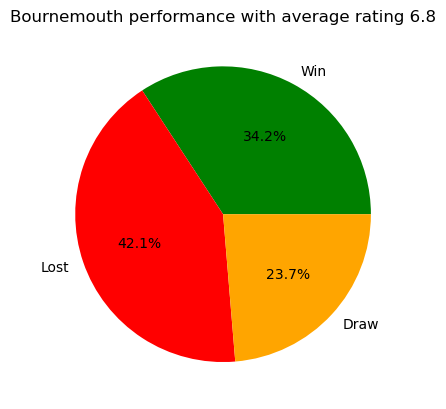

****************************************************************************************************


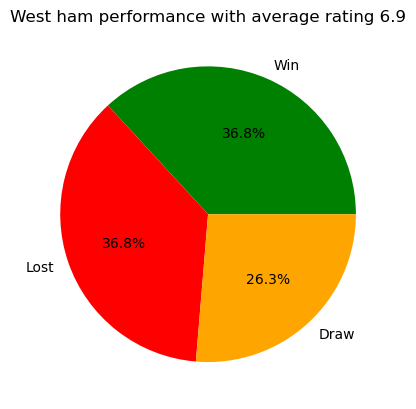

****************************************************************************************************


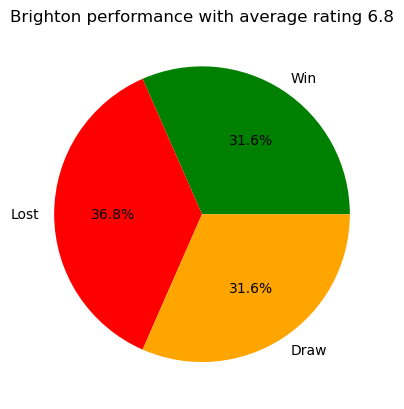

****************************************************************************************************


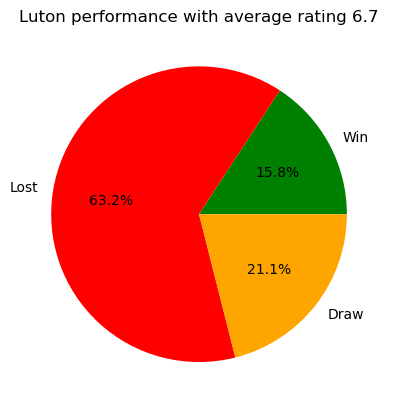

****************************************************************************************************


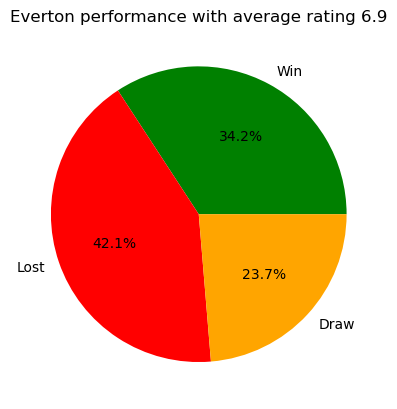

****************************************************************************************************


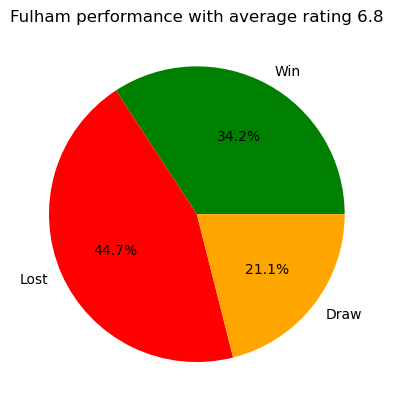

****************************************************************************************************


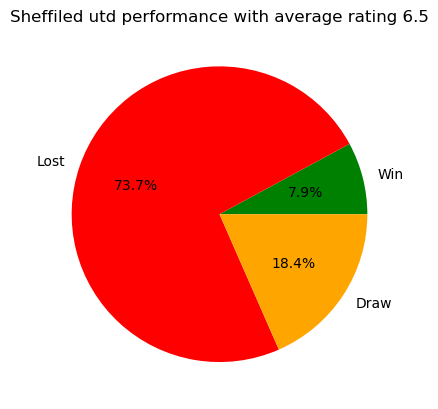

****************************************************************************************************


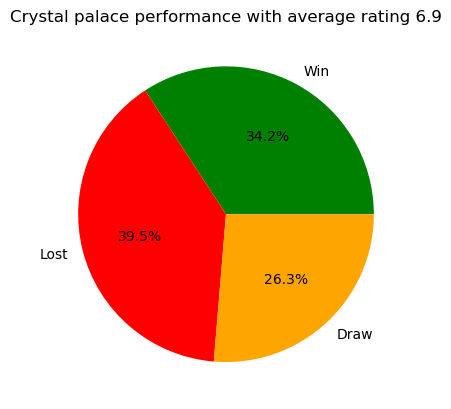

****************************************************************************************************


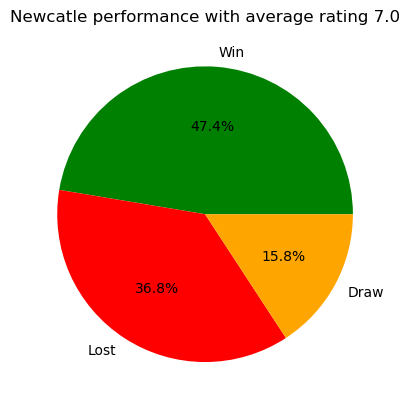

****************************************************************************************************


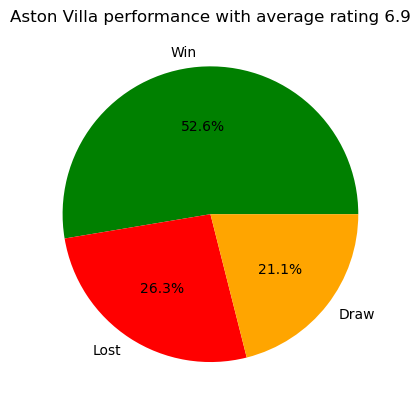

****************************************************************************************************


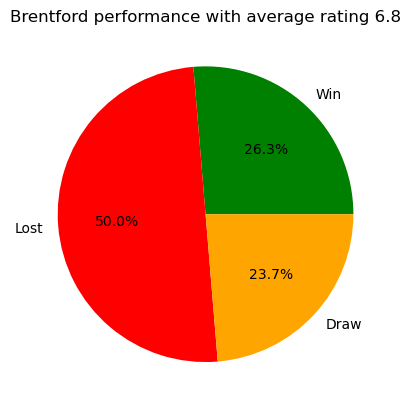

****************************************************************************************************


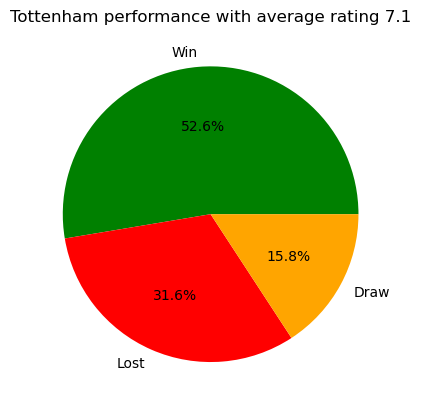

****************************************************************************************************


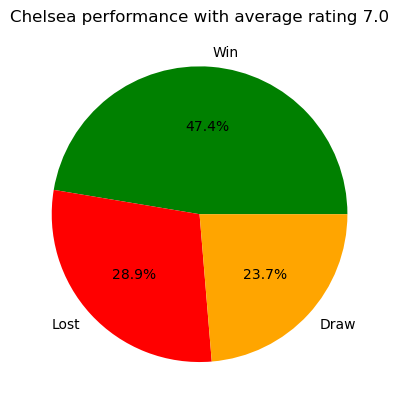

****************************************************************************************************


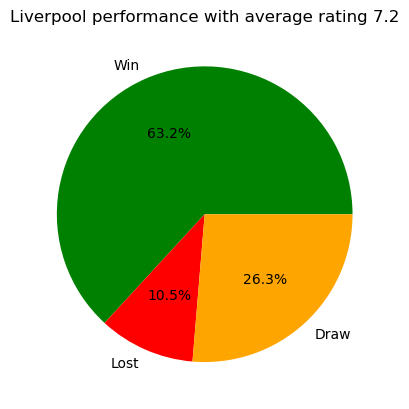

****************************************************************************************************


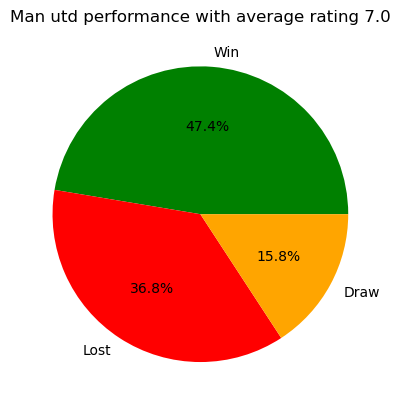

****************************************************************************************************


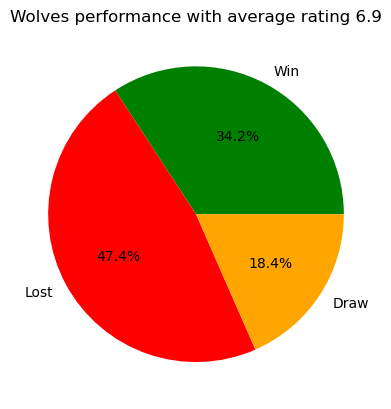

****************************************************************************************************


In [42]:
# Create pie charts for each team's performance
for team in df.Team.unique():
    temp_df = df[df['Team']==team]
    pie([temp_df.Result.to_list().count(r) for r in ['Win','Lost','Draw']],labels=['Win','Lost','Draw'],autopct='%1.1f%%',colors=['green','red','orange'])
    title(f'{team} performance with average rating {temp_df["Team rating"].mean():0.1f}')
    savefig(f'Teams plots\\{team}.png') # Save each plot as a png file
    show()
    print('*'*100)

In [43]:
# Analyze and find the most common system
temp_df = df[df.columns[3:14]]
temp_df2 = temp_df.drop_duplicates()
counts = [temp_df.to_numpy().tolist().count(system) for system in temp_df2.to_numpy().tolist()]
temp_df2.loc[counts.index(max(counts))]

CB    2
LB    1
RB    1
ST    1
CM    0
AM    1
LM    0
DM    2
LW    1
RW    1
RM    0
Name: 0, dtype: int64

Most popular line up is 4-2-3-1

# Phase 2: Machine Learing

### Part 1: Data preprocessing

In [44]:
# Import necessaries
from numpy import array
from pickle import dump
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix

In [45]:
# Create a dictionary for mapping results to numeric values
Result_dict = {'Lost':0,'Draw':2,'Win':1}
label = array([Result_dict[i] for i in df.Result])

In [46]:
# Create a dictionary for teams and map each team to a unique integer
Teams_dict = dict()
teams = list()
c = 1
for team in df.Team:
    if team in Teams_dict.keys():
        teams.append(Teams_dict[team])
    else:
        Teams_dict[team] = c
        teams.append(Teams_dict[team])
        c+=1

with open('Teams_dict.pkl','wb') as file: # Save the dictionary as a pickle file
    dump(Teams_dict,file)
teams = DataFrame(array(teams,dtype='int64'),columns=['Teams'])

In [47]:
# Convert categorical 'Status' column to dummy variables
status = get_dummies(df.Status) 

In [48]:
# Drop unnecessary columns from the dataframe
new_df = df.drop(['Result','Status','Round','Team'],axis=1)

# Concatenate the teams, status, and new dataframe
final_df = concat([teams,status,new_df],axis=1)

final_df.head()

,Teams,Guest,Home,Team rating,CB,LB,RB,ST,CM,AM,...,LBr,RBr,STr,CMr,AMr,LMr,DMr,LWr,RWr,RMr
0,1,True,False,7.3,2,1,1,1,0,1,...,1,1,1,2,0,1,0,0,0,1
1,2,False,True,6.0,3,1,1,1,2,0,...,1,1,1,0,1,0,2,1,1,0
2,3,False,True,7.4,2,1,1,1,3,0,...,0,0,1,2,0,1,0,1,1,1
3,4,True,False,6.5,3,0,0,1,2,0,...,1,1,1,3,0,0,0,1,1,0
4,5,False,True,6.6,2,1,1,1,0,1,...,1,1,1,0,1,0,2,1,1,0


In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Teams              760 non-null    int64  
 1   Guest              760 non-null    bool   
 2   Home               760 non-null    bool   
 3   Team rating        760 non-null    float64
 4   CB                 760 non-null    int64  
 5   LB                 760 non-null    int64  
 6   RB                 760 non-null    int64  
 7   ST                 760 non-null    int64  
 8   CM                 760 non-null    int64  
 9   AM                 760 non-null    int64  
 10  LM                 760 non-null    int64  
 11  DM                 760 non-null    int64  
 12  LW                 760 non-null    int64  
 13  RW                 760 non-null    int64  
 14  RM                 760 non-null    int64  
 15  Rival team rating  760 non-null    float64
 16  CBr                760 non

In [50]:
# Split the dataset into training and testing sets
xtr , xts , ytr , yts = train_test_split(final_df.to_numpy(),label,test_size=0.1,shuffle=False,random_state=52)
print('Train set size :%d\nTest set size :%d'%(len(xtr),len(xts)))

Train set size :684
Test set size :76


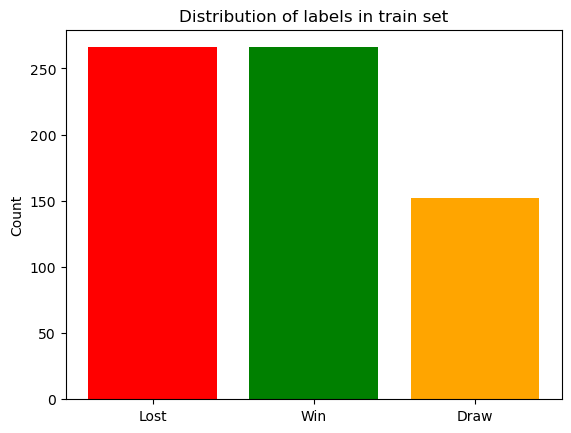

In [51]:
# Plot the distribution of labels in the training set
bar(['Lost','Win','Draw'],[ytr.tolist().count(r) for r in [0,1,2]],color=['red','green','orange'])
title('Distribution of labels in train set')
ylabel('Count')
show()

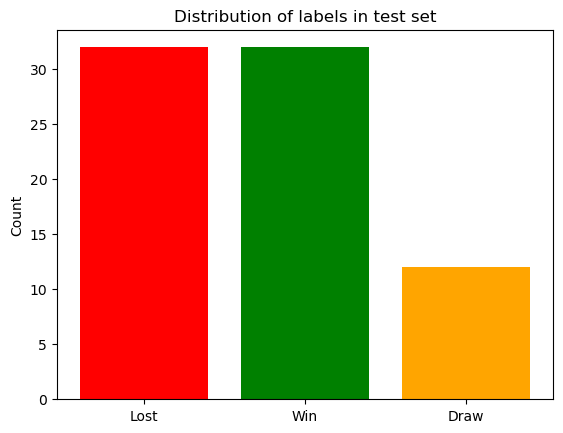

In [52]:
# Plot the distribution of labels in the test set
bar(['Lost','Win','Draw'],[yts.tolist().count(r) for r in [0,1,2]],color=['red','green','orange'])
title('Distribution of labels in test set')
ylabel('Count')
show()

### Part 2 :Modeling and Evaluating

In [59]:
# Train a Random Forest classifier
model = RandomForestClassifier()
model.fit(xtr,ytr)

RandomForestClassifier()

In [60]:
print('Accuracy on train set :',model.score(xtr,ytr)*100)

Accuracy on train set : 100.0


In [61]:
print('Accuracy on test set :',model.score(xts,yts)*100)

Accuracy on test set : 93.42105263157895


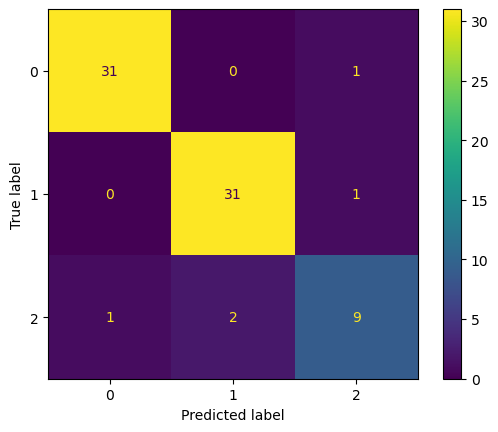

In [62]:
# Predict and display the confusion matrix
pred = model.predict(xts)
con = confusion_matrix(yts,pred)
display = ConfusionMatrixDisplay(con)
display.plot()

In [63]:
model.fit(final_df,label)
print('Accuracy on total data :',model.score(final_df,label)*100)

Accuracy on total data : 100.0


In [64]:
# Save the trained model
with open('model.pkl','wb') as file:
    dump(model,file)

# End

Contact information:

LinkedIn: https://www.linkedin.com/in/pourea-ziasistani-b58972238/

Email: poureaziasistani@gmail.com